## 라이브러리 임포트

In [2]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [43]:
from transformers import BertTokenizer, BertModel

In [4]:
# torch
import torch 

In [5]:
# 평가지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [6]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
# font manager
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# tqdm
from tqdm import tqdm

In [9]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
import re

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [14]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:11
      --------------------------------------- 0.3/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.3/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용중인 디바이스:", device)

사용중인 디바이스: cuda


In [19]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? True
사용 중인 GPU: NVIDIA GeForce MX450


## Data Load

In [20]:
pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
path = kagglehub.dataset_download("datasnaek/youtube-new")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\wonny\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [22]:
# Load USvideo Dataset
df = pd.read_csv(os.path.join(path, "USvideos.csv"))

### Category mapping & filtering

In [23]:
# Category mapping 
# json file
json_path = os.path.join(path, "US_category_id.json")

# Json load
with open(json_path, 'r', encoding = 'utf-8') as f:
    category_json = json.load(f)

category_mapping = {
    int(item['id']): item['snippet']['title']
    for item in category_json['items']}

In [24]:
df['category_name'] = df['category_id'].map(category_mapping)

In [25]:
# category filtering
cat_name = 'Gaming'
game_data = df[df['category_name'] == cat_name].copy()

In [26]:
game_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
131,lsfzA7sWlOM,17.14.11,L.A. Noire - Nintendo Switch Trailer,Nintendo,20,2017-11-09T19:59:48.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",154872,7683,164,1734,https://i.ytimg.com/vi/lsfzA7sWlOM/default.jpg,False,False,False,Amid the post-war boom of Hollywood's Golden A...,Gaming
392,lsfzA7sWlOM,17.15.11,L.A. Noire - Nintendo Switch Trailer,Nintendo,20,2017-11-09T19:59:48.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",161231,7803,169,1479,https://i.ytimg.com/vi/lsfzA7sWlOM/default.jpg,False,False,False,Amid the post-war boom of Hollywood's Golden A...,Gaming
405,EEIP1YpFXrE,17.16.11,Our First Date,iHasCupquake,20,2017-11-15T20:00:00.000Z,"first date|""animation""|""animated""|""short""|""sho...",224426,17784,225,2762,https://i.ytimg.com/vi/EEIP1YpFXrE/default.jpg,False,False,False,Here's an animation short of our First Date! W...,Gaming
619,EEIP1YpFXrE,17.17.11,Our First Date,iHasCupquake,20,2017-11-15T20:00:00.000Z,"first date|""animation""|""animated""|""short""|""sho...",463992,25840,509,3708,https://i.ytimg.com/vi/EEIP1YpFXrE/default.jpg,False,False,False,Here's an animation short of our First Date! W...,Gaming
652,hXcoq5XDwyA,17.17.11,Playing CUPHEAD with MatPat!,Butch Hartman,20,2017-11-15T22:02:34.000Z,"game theory|""film theory""|""cuphead""|""don't dea...",55460,3871,96,428,https://i.ytimg.com/vi/hXcoq5XDwyA/default.jpg,False,False,False,"After my appearance on GTLive, MatPat (Game Th...",Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,9jRtpMKLsts,18.14.06,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",The Official Pokémon YouTube channel,20,2018-05-30T01:22:17.000Z,"Pokémon|""Pokemon""|""Pokémon Let's Go""|""Pokémon ...",9992803,230507,24911,60041,https://i.ytimg.com/vi/9jRtpMKLsts/default.jpg,False,False,False,Return to the Kanto region and experience a cl...,Gaming
40911,tn0hCTyj2Kc,18.14.06,The Sims 4 Seasons: Official Reveal Trailer,The Sims,20,2018-05-24T16:59:24.000Z,"The Sims 4|""The Sims 4 Trailer""|""Sims 4 Traile...",1749832,77408,1392,18242,https://i.ytimg.com/vi/tn0hCTyj2Kc/default.jpg,False,False,False,Add weather to your Sims’ lives to tell new st...,Gaming
40919,vDyYMcjf500,18.14.06,The History of Fortnite Battle Royale - Did Yo...,DidYouKnowGaming?,20,2018-05-24T19:00:24.000Z,"fortnite|""fortnite pc""|""fortnite battle royale...",324219,7840,1333,1257,https://i.ytimg.com/vi/vDyYMcjf500/default.jpg,False,False,False,Thanks to Skillshare for sponsoring this video...,Gaming
40936,Xr2rgT9uEnA,18.14.06,LIE DETECTOR TEST WITH MY GIRLFRIEND!,miniminter,20,2018-05-20T18:00:02.000Z,"miniminter|""mm7games""|""simon""|""random""|""lie de...",3229540,109945,3062,6774,https://i.ytimg.com/vi/Xr2rgT9uEnA/default.jpg,False,False,False,Talia: https://www.youtube.com/user/nataliahad...,Gaming


## Data Preporcessing

In [27]:
# 사용할 칼럼만 추출 
game = game_data[['title', 'views', 'description']].copy()

In [28]:
game

,title,views,description
131,L.A. Noire - Nintendo Switch Trailer,154872,Amid the post-war boom of Hollywood's Golden A...
392,L.A. Noire - Nintendo Switch Trailer,161231,Amid the post-war boom of Hollywood's Golden A...
405,Our First Date,224426,Here's an animation short of our First Date! W...
619,Our First Date,463992,Here's an animation short of our First Date! W...
652,Playing CUPHEAD with MatPat!,55460,"After my appearance on GTLive, MatPat (Game Th..."
...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,Return to the Kanto region and experience a cl...
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,Add weather to your Sims’ lives to tell new st...
40919,The History of Fortnite Battle Royale - Did Yo...,324219,Thanks to Skillshare for sponsoring this video...
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,Talia: https://www.youtube.com/user/nataliahad...


In [30]:
# target scaling (log1p + standard)
game['log_views'] = np.log1p(game['views'])

scaler = StandardScaler()
game['log_views_scaled'] = scaler.fit_transform(game[['log_views']])

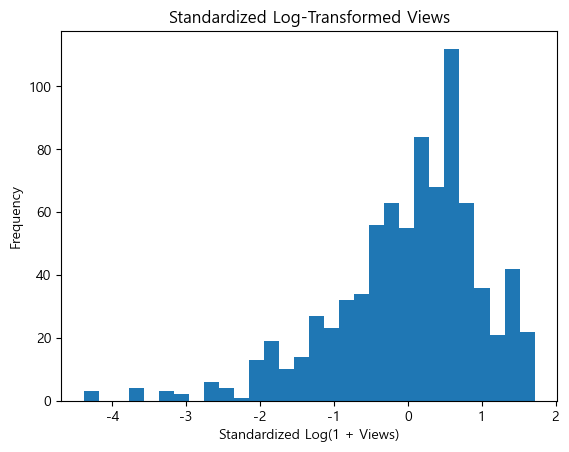

In [31]:
plt.hist(game['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

---------------------------------------------------------------------------------------------------------------------

## Modeling

### function definition

In [35]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 형태소 분석
    doc = nlp(text)

    # 4. 명사/형용사 + 불용어 제거 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [36]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거 (알파벳만 남김)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 분석
    doc = nlp(text)

    # 4. 불용어 제거 + 명사/형용사 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [37]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [38]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # 교집합
    return ' '.join(common) if common else ''

In [32]:
def extract_features(row):
    features = {}

    # 원본 텍스트
    title = row['title'] if isinstance(row['title'], str) else ''
    desc = row['description'] if isinstance(row['description'], str) else ''

    # 전처리된 텍스트
    cleaned_title = preprocess_title(title)
    cleaned_desc = preprocess_description(desc)

    # 공통 단어
    title_words = set(cleaned_title.split())
    desc_words = set(cleaned_desc.split())
    common = title_words & desc_words
    features['n_common_words'] = len(common)
    features['common_words'] = ' '.join(common)

    # 제목 길이 및 단어 수 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # 느낌표 / 물음표 개수
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # 숫자 포함 여부 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # 키워드 포함 여부 (사전 정의된 keyword 리스트 필요)
    keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer'
    ]
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # 대문자 비율 30% 이상 여부
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # 품사 카운트
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


In [33]:
def compute_rule_score(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += -0.03 * features['title_len']

    # 2. 단어 수: 많을수록 클릭 유도 가능성 있음
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score += 0.5 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.1 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.5 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    # 9. 공통 단어 개수 (title과 desc 간 overlap)
    score += 0.3 * features.get('n_common_words', 0)

    return score

In [45]:
# CLS 벡터 추출 함수
def extract_cls_embedding(text):
    encoding = tokenizer(text,
                         max_length=32,
                         truncation=True,
                         padding='max_length',
                         return_tensors='pt')
    input_ids_tensor = encoding['input_ids'].to(device)
    attention_mask_tensor = encoding['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids_tensor, attention_mask=attention_mask_tensor)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

In [57]:
# Model 성능 평가 함수 
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Spearman: {spearman_corr:.4f}")
    
    return model, rmse, r2, spearman_corr

### rule-based feature

In [40]:
# 조회수가 높은 영상에 자주 등장하는 키워드 사전 구축 
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer']

hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

In [41]:
game['rule_score'] = game.apply(lambda row: compute_rule_score(extract_features(row)), axis=1)

In [42]:
game

,title,views,description,log_views,log_views_scaled,rule_score
131,L.A. Noire - Nintendo Switch Trailer,154872,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,0.02
392,L.A. Noire - Nintendo Switch Trailer,161231,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,0.02
405,Our First Date,224426,Here's an animation short of our First Date! W...,12.321306,-1.054013,0.08
619,Our First Date,463992,Here's an animation short of our First Date! W...,13.047625,-0.588606,0.08
652,Playing CUPHEAD with MatPat!,55460,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,-0.24
...,...,...,...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,Return to the Kanto region and experience a cl...,16.117376,1.378417,1.25
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,Add weather to your Sims’ lives to tell new st...,14.375031,0.261964,0.51
40919,The History of Fortnite Battle Royale - Did Yo...,324219,Thanks to Skillshare for sponsoring this video...,12.689178,-0.818290,1.24
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,Talia: https://www.youtube.com/user/nataliahad...,14.987851,0.654644,-0.31


### BERT embeddings

In [44]:
# BERT load 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [46]:
## 전체 제목을 cls로 추출 
embeddings = np.array([
    extract_cls_embedding(title) for title in tqdm(game['title'])
])

100%|████████████████████████████████████████████████████████████████████████████████| 817/817 [00:15<00:00, 51.52it/s]


### Hybrid model - feature level

먼저 피처들 간 스케일 차이 확인 후 피처 스케일링 진행

In [47]:
rule_score = game[['rule_score']].values

In [49]:
bert_dim_0 = embeddings[:, 0]

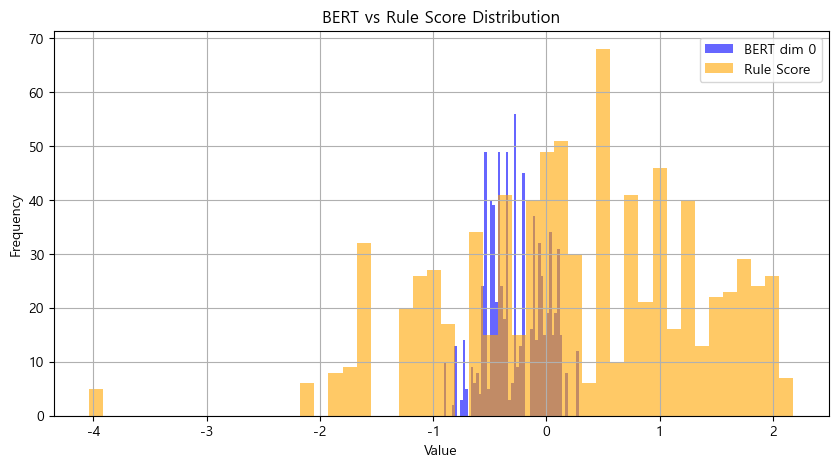

In [51]:
# 두 피처의 분포를 시각화해서 스케일링 필요한지 확인 
plt.figure(figsize=(10, 5))
plt.hist(bert_dim_0, bins=50, alpha=0.6, label='BERT dim 0', color='blue')
plt.hist(rule_score, bins=50, alpha=0.6, label='Rule Score', color='orange')
plt.title('BERT vs Rule Score Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# 피처 스케일링
rule_scaled = scaler.fit_transform(game[['rule_score']])

피처 결합하여 다양한 모델로 실험

In [55]:
# 두 피처 결합
X = np.hstack([embeddings, rule_scaled])

# target 처리
y = game['log_views_scaled']

# test, train dataset 분리 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

----------------------------------------------------------------------------------------------------------------------

Linear Regression

In [65]:
# Linear Regression 
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

RMSE: 488097252058.0101
R²: -263369419582098353684480.0000
Spearman: 0.9376


(LinearRegression(),
 np.float64(488097252058.01013),
 -2.6336941958209835e+23,
 np.float64(0.9376324818585974))

결과값이 이상함 - 디버깅

In [69]:
# 예측값
y_pred = lr.predict(X_test)

# 로그 스케일이면 되돌림
y_pred_raw = np.expm1(y_pred)
y_test_raw = np.expm1(y_test)

# 비교
for yt, yp in zip(y_test_raw[:10], y_pred_raw[:10]):
    print(f"True: {yt:.0f} / Pred: {yp:.0f}")

True: -0 / Pred: -0
True: 2 / Pred: 3
True: -1 / Pred: -1
True: 1 / Pred: 1
True: 1 / Pred: 1
True: 3 / Pred: inf
True: -0 / Pred: -0
True: 1 / Pred: 1
True: -0 / Pred: -0
True: -1 / Pred: -1


C:\Users\wonny\AppData\Local\Temp\ipykernel_16612\599550809.py:5: RuntimeWarning: overflow encountered in expm1
  y_pred_raw = np.expm1(y_pred)


예측값이 무한대로 튀는 경우가 있음을 확인함. 문제 확인을 위해 디버깅

In [70]:
print("Rule Score (정규화 후): mean =", rule_scaled.mean(), "/ std =", rule_scaled.std())

Rule Score (정규화 후): mean = -1.7393947019831092e-17 / std = 1.0


In [71]:
coef = lr.coef_
print("전체 계수 개수:", len(coef))
print("rule_score 계수:", coef[-1])
print("BERT 계수 평균 ± 표준편차:", np.mean(coef[:-1]), "+-", np.std(coef[:-1]))

전체 계수 개수: 769
rule_score 계수: -892101767147.4353
BERT 계수 평균 ± 표준편차: 17257247661.261913 +- 1865309624643.1924


rule-score의 계수가 너무 커서 튀는 현상 발견 -> 다중공선성일 가능성이 높음, Ridge / Lasso를 통해 해결

----------------------------------------------------------------------------------------------------------------------

In [59]:
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, y_train, X_test, y_test)

RMSE: 0.2361
R²: 0.9384
Spearman: 0.9677


(Ridge(),
 np.float64(0.23607842029588313),
 0.9383880148199366,
 np.float64(0.9677452143053162))

----------------------------------------------------------------------------------------------------------------------

In [60]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test)

RMSE: 0.2664
R²: 0.9216
Spearman: 0.9533


(RandomForestRegressor(n_jobs=-1, random_state=42),
 np.float64(0.26635061243949965),
 0.9215740079810938,
 np.float64(0.9532760940673616))

----------------------------------------------------------------------------------------------------------------------

In [61]:
gradient = GradientBoostingRegressor(n_estimators=100, random_state=42)
evaluate_model(gradient, X_train, y_train, X_test, y_test)

RMSE: 0.2618
R²: 0.9243
Spearman: 0.9538


(GradientBoostingRegressor(random_state=42),
 np.float64(0.2617591272481992),
 0.9242545954707022,
 np.float64(0.953817631574857))

In [81]:
results = []

models = {
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    trained_model, rmse, r2, spearman = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R²": r2,
        "Spearman": spearman
    })


Evaluating Lasso...
RMSE: 0.5098
R²: 0.7127
Spearman: 0.8483
Evaluating Ridge...
RMSE: 0.2361
R²: 0.9384
Spearman: 0.9677
Evaluating RandomForest...
RMSE: 0.2664
R²: 0.9216
Spearman: 0.9533
Evaluating GradientBoosting...
RMSE: 0.2618
R²: 0.9243
Spearman: 0.9538


In [82]:
results_df = pd.DataFrame(results)

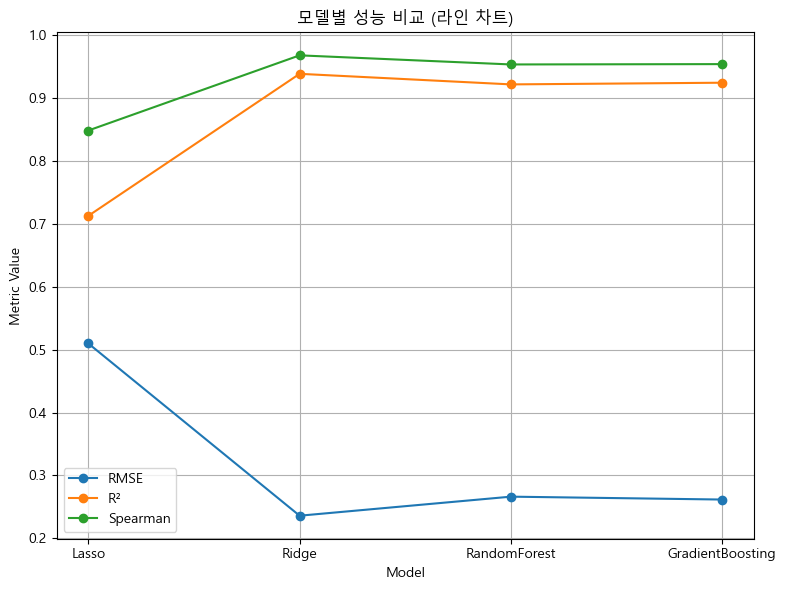

In [83]:
metrics = ["RMSE", "R²", "Spearman"]

plt.figure(figsize=(8, 6))

metrics = ["RMSE", "R²", "Spearman"]
for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("모델별 성능 비교 (라인 차트)")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
results_df

,Model,RMSE,R²,Spearman
0,Lasso,0.509804,0.712685,0.848305
1,Ridge,0.236078,0.938388,0.967745
2,RandomForest,0.266351,0.921574,0.953276
3,GradientBoosting,0.261759,0.924255,0.953818


-------------------------------------------------------------------------------------------------------------------------

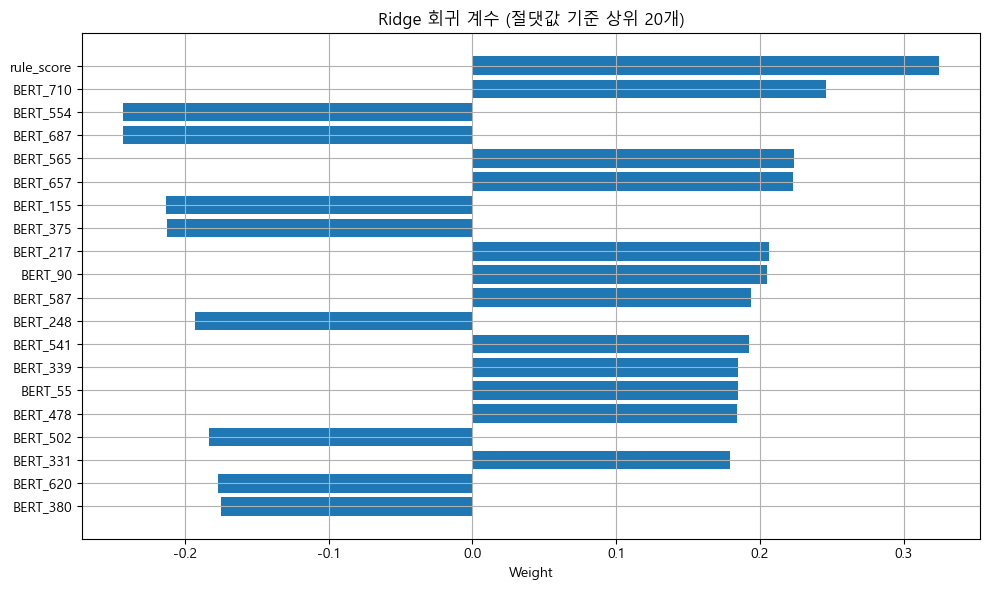

In [86]:
# Ridge 계수 추출
coef = ridge.coef_

# 시각화 (상위 N개)
top_n = 20
indices = np.argsort(np.abs(coef))[-top_n:]  # 절댓값 큰 계수 기준
feature_names = [f"BERT_{i}" for i in range(X_train.shape[1] - 1)] + ["rule_score"]

top_features = [feature_names[i] for i in indices]
top_weights = coef[indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_weights)
plt.title("Ridge 회귀 계수 (절댓값 기준 상위 20개)")
plt.xlabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()